In [2]:
#Print all the variables, not only the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

/Users/ressnn/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, auc

from tensorflow.python.keras import layers, models

from tensorflow.python.keras.layers.recurrent import LSTM

In [18]:
def f(x):
    if x>0.5:
        return 1
    else:
        return 0

In [10]:
def acu_curve(y,prob):
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
    print(roc_auc)
 
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
 
    plt.show()

In [51]:
data0 = pd.read_csv('raw_stock_data.csv').drop('Unnamed: 0',axis=1).sample(frac=0.25, replace=False)
data1 = pd.read_csv('result_data1.csv').drop('Unnamed: 0',axis=1).sample(frac=0.3, replace=False)
data2 = pd.read_csv('result_data2.csv').drop('Unnamed: 0',axis=1).sample(frac=0.5, replace=False)
data3 = pd.read_csv('result_data3.csv').drop('Unnamed: 0',axis=1).sample(frac=0.1, replace=False)
data4 = pd.read_csv('result_data4.csv').drop('Unnamed: 0',axis=1).sample(frac=0.5, replace=False)
data5 = pd.read_csv('result_data5.csv').drop('Unnamed: 0',axis=1).sample(frac=0.3, replace=False)
data6 = pd.read_csv('result_data6.csv').drop('Unnamed: 0',axis=1).sample(frac=0.1, replace=False)
data7 = pd.read_csv('result_data7.csv').drop('Unnamed: 0',axis=1).sample(frac=0.3, replace=False)

In [52]:
data0.size
data1.size
data2.size
data3.size
data4.size
data5.size
data6.size
data7.size

715872

870389

588458

520940

746895

651840

535632

738108

Epoch 1/20
71587/71587 [==============================] - 580s 8ms/step - loss: 0.2524
Epoch 2/20
71587/71587 [==============================] - 597s 8ms/step - loss: 0.2504
Epoch 3/20
71587/71587 [==============================] - 551s 8ms/step - loss: 0.2287
Epoch 4/20
71587/71587 [==============================] - 536s 7ms/step - loss: 0.1917
Epoch 5/20
71587/71587 [==============================] - 540s 8ms/step - loss: 0.1772
Epoch 6/20
71587/71587 [==============================] - 537s 8ms/step - loss: 0.1725
Epoch 7/20
71587/71587 [==============================] - 539s 8ms/step - loss: 0.1710
Epoch 8/20
71587/71587 [==============================] - 599s 8ms/step - loss: 0.1689 0s - loss: 0
Epoch 9/20
71587/71587 [==============================] - 615s 9ms/step - loss: 0.1634
Epoch 10/20
71587/71587 [==============================] - 622s 9ms/step - loss: 0.1637
Epoch 11/20
71587/71587 [==============================] - 644s 9ms/step - loss: 0.1629
Epoch 12/20
71587/71587 [===

0.7327093596059113
0.8198655054569507
0.7571101301894172
0.8532202263269272


<Figure size 432x288 with 0 Axes>

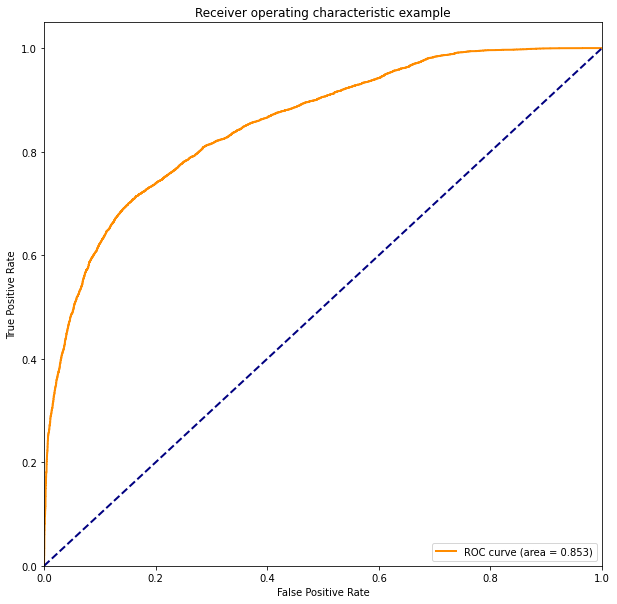

In [29]:
X=data0.drop(['trade_date','trend'],axis=1).values
y=data0.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

new_Xtrain_set = np.reshape( Xtrain_set, (Xtrain_set.shape[0], Xtrain_set.shape[1], 1) )#Lstm调用库函数必须要进行维度转换

model = models.Sequential()
model.add( LSTM( 40, input_shape=(new_Xtrain_set.shape[1], new_Xtrain_set.shape[2]), return_sequences=True) )
model.add( LSTM( 5, return_sequences=False ) )
model.add( layers.Dropout( 0.2 ) )
model.add( layers.Dense( 1 ) )
model.compile( loss="mse", optimizer="rmsprop" )
model.fit( new_Xtrain_set, ytrain_set, epochs=20, batch_size=1)#参数依次为特征，标签，训练循环次数，小批量（一次放入训练的数据个数）

new_Xtest = np.reshape( Xtest, (Xtest.shape[0], Xtest.shape[1], 1) )#维度转换
pred_test_prob = model.predict(new_Xtest)
pred_test=list(map(f,pred_test_prob))
#pred_test_prob = model.predict_proba(new_Xtest)[:,1]

print(precision_score(ytest, pred_test))
print(recall_score(ytest, pred_test))
print(accuracy_score(ytest, pred_test))
acu_curve(ytest,pred_test_prob)

Epoch 1/20
53562/53562 [==============================] - 633s 12ms/step - loss: 0.2522
Epoch 2/20
53562/53562 [==============================] - 2643s 49ms/step - loss: 0.2491
Epoch 3/20
53562/53562 [==============================] - 1620s 30ms/step - loss: 0.2208
Epoch 4/20
53562/53562 [==============================] - 827s 15ms/step - loss: 0.1906
Epoch 5/20
53562/53562 [==============================] - 4665s 87ms/step - loss: 0.1765
Epoch 6/20
53562/53562 [==============================] - 826s 15ms/step - loss: 0.1747
Epoch 7/20
53562/53562 [==============================] - 894s 17ms/step - loss: 0.1751
Epoch 8/20
53562/53562 [==============================] - 824s 15ms/step - loss: 0.1697
Epoch 9/20
53562/53562 [==============================] - 677s 13ms/step - loss: 0.1674
Epoch 10/20
53562/53562 [==============================] - 980s 18ms/step - loss: 0.1631
Epoch 11/20
53562/53562 [==============================] - 644s 12ms/step - loss: 0.1638
Epoch 12/20
53562/53562 [==

0.8750221278102319
0.7088770973755916
0.7956836681353148
0.9048447430473155


<Figure size 432x288 with 0 Axes>

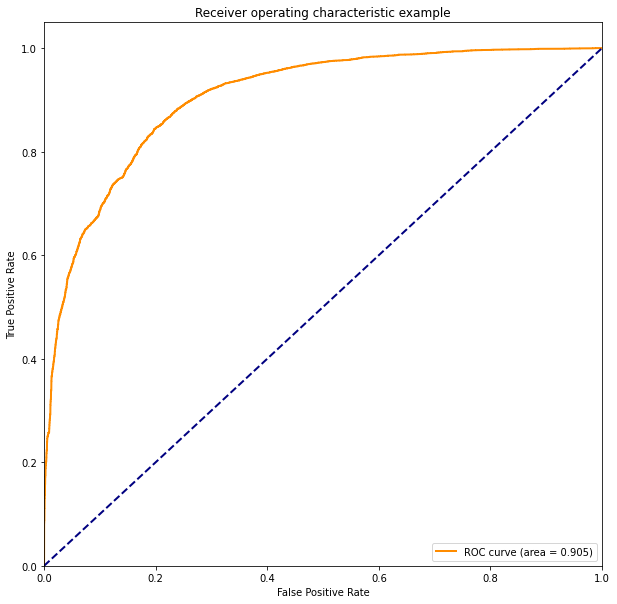

In [23]:
X=data1.drop(['trade_date','trend','trade_month'],axis=1).values
y=data1.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

new_Xtrain_set = np.reshape( Xtrain_set, (Xtrain_set.shape[0], Xtrain_set.shape[1], 1) )#Lstm调用库函数必须要进行维度转换

model = models.Sequential()
model.add( LSTM( 40, input_shape=(new_Xtrain_set.shape[1], new_Xtrain_set.shape[2]), return_sequences=True) )
model.add( LSTM( 5, return_sequences=False ) )
model.add( layers.Dropout( 0.2 ) )
model.add( layers.Dense( 1 ) )
model.compile( loss="mse", optimizer="rmsprop" )
model.fit( new_Xtrain_set, ytrain_set, epochs=20, batch_size=1)#参数依次为特征，标签，训练循环次数，小批量（一次放入训练的数据个数）

new_Xtest = np.reshape( Xtest, (Xtest.shape[0], Xtest.shape[1], 1) )#维度转换
pred_test_prob = model.predict(new_Xtest)
pred_test=list(map(f,pred_test_prob))

print(precision_score(ytest, pred_test))
print(recall_score(ytest, pred_test))
print(accuracy_score(ytest, pred_test))
acu_curve(ytest, pred_test_prob)

Epoch 1/20
36212/36212 [==============================] - 491s 13ms/step - loss: 0.2552
Epoch 2/20
36212/36212 [==============================] - 443s 12ms/step - loss: 0.2505
Epoch 3/20
36212/36212 [==============================] - 462s 13ms/step - loss: 0.2512
Epoch 4/20
36212/36212 [==============================] - 531s 15ms/step - loss: 0.2510
Epoch 5/20
36212/36212 [==============================] - 516s 14ms/step - loss: 0.2505
Epoch 6/20
36212/36212 [==============================] - 483s 13ms/step - loss: 0.2503
Epoch 7/20
36212/36212 [==============================] - 429s 12ms/step - loss: 0.2503
Epoch 8/20
36212/36212 [==============================] - 439s 12ms/step - loss: 0.2502
Epoch 9/20
36212/36212 [==============================] - 454s 13ms/step - loss: 0.2502
Epoch 10/20
36212/36212 [==============================] - 548s 15ms/step - loss: 0.2503
Epoch 11/20
36212/36212 [==============================] - 473s 13ms/step - loss: 0.2502
Epoch 12/20
36212/36212 [=====

0.5003313452617627
1.0
0.5003313452617627
0.5


<Figure size 432x288 with 0 Axes>

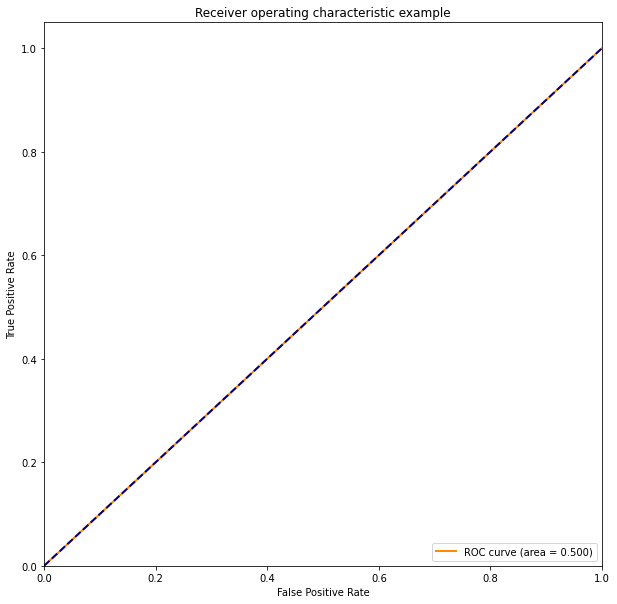

In [36]:
X=data2.drop(['trade_date','trend','trade_month'],axis=1).values
y=data2.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

new_Xtrain_set = np.reshape( Xtrain_set, (Xtrain_set.shape[0], Xtrain_set.shape[1], 1) )#Lstm调用库函数必须要进行维度转换

model = models.Sequential()
model.add( LSTM( 40, input_shape=(new_Xtrain_set.shape[1], new_Xtrain_set.shape[2]), return_sequences=True) )
model.add( LSTM( 5, return_sequences=False ) )
model.add( layers.Dropout( 0.2 ) )
model.add( layers.Dense( 1 ) )
model.compile( loss="mse", optimizer="rmsprop" )
model.fit( new_Xtrain_set, ytrain_set, epochs=20, batch_size=1)#参数依次为特征，标签，训练循环次数，小批量（一次放入训练的数据个数）

new_Xtest = np.reshape( Xtest, (Xtest.shape[0], Xtest.shape[1], 1) )#维度转换
pred_test_prob = model.predict(new_Xtest)
pred_test=list(map(f,pred_test_prob))

print(precision_score(ytest, pred_test))
print(recall_score(ytest, pred_test))
print(accuracy_score(ytest, pred_test))
acu_curve(ytest, pred_test_prob)

Epoch 1/20
62513/62513 [==============================] - 1224s 20ms/step - loss: 0.2522
Epoch 2/20
62513/62513 [==============================] - 1302s 21ms/step - loss: 0.2502
Epoch 3/20
62513/62513 [==============================] - 1157s 19ms/step - loss: 0.2504
Epoch 4/20
62513/62513 [==============================] - 1112s 18ms/step - loss: 0.2506
Epoch 5/20
62513/62513 [==============================] - 1113s 18ms/step - loss: 0.2508
Epoch 6/20
62513/62513 [==============================] - 1118s 18ms/step - loss: 0.2517
Epoch 7/20
62513/62513 [==============================] - 1114s 18ms/step - loss: 0.2503
Epoch 8/20
62513/62513 [==============================] - 1122s 18ms/step - loss: 0.2505
Epoch 9/20
62513/62513 [==============================] - 1491s 24ms/step - loss: 0.2509
Epoch 10/20
62513/62513 [==============================] - 1368s 22ms/step - loss: 0.2502
Epoch 11/20
62513/62513 [==============================] - 3823s 61ms/step - loss: 0.2504
Epoch 12/20
62513/6

0.519992172721936
0.9895729890764647
0.5237699149017851
0.5414375959462949


<Figure size 432x288 with 0 Axes>

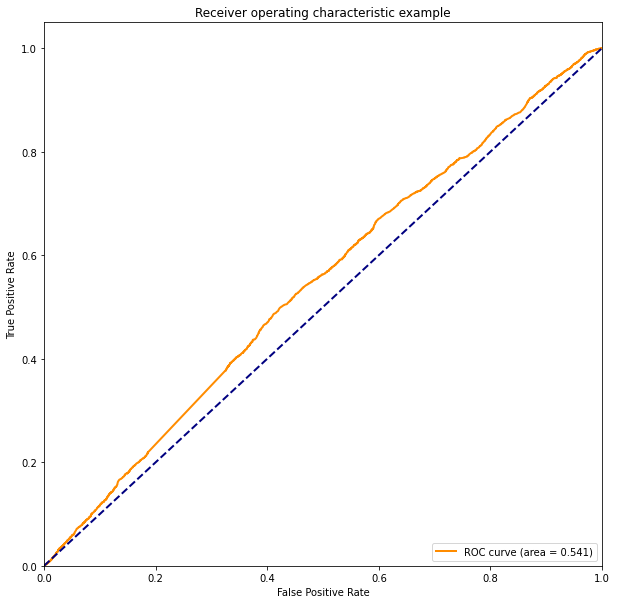

In [42]:
X=data3.drop(['trend','trade_month'],axis=1).values
y=data3.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

new_Xtrain_set = np.reshape( Xtrain_set, (Xtrain_set.shape[0], Xtrain_set.shape[1], 1) )#Lstm调用库函数必须要进行维度转换

model = models.Sequential()
model.add( LSTM( 40, input_shape=(new_Xtrain_set.shape[1], new_Xtrain_set.shape[2]), return_sequences=True) )
model.add( LSTM( 5, return_sequences=False ) )
model.add( layers.Dropout( 0.2 ) )
model.add( layers.Dense( 1 ) )
model.compile( loss="mse", optimizer="rmsprop" )
model.fit( new_Xtrain_set, ytrain_set, epochs=20, batch_size=1)#参数依次为特征，标签，训练循环次数，小批量（一次放入训练的数据个数）

new_Xtest = np.reshape( Xtest, (Xtest.shape[0], Xtest.shape[1], 1) )#维度转换
pred_test_prob = model.predict(new_Xtest)
pred_test=list(map(f,pred_test_prob))

print(precision_score(ytest, pred_test))
print(recall_score(ytest, pred_test))
print(accuracy_score(ytest, pred_test))
acu_curve(ytest, pred_test_prob)



Epoch 1/20
35148/35148 [==============================] - 552s 16ms/step - loss: 0.2553
Epoch 2/20
35148/35148 [==============================] - 518s 15ms/step - loss: 0.2509
Epoch 3/20
35148/35148 [==============================] - 520s 15ms/step - loss: 0.2504
Epoch 4/20
35148/35148 [==============================] - 522s 15ms/step - loss: 0.2504
Epoch 5/20
35148/35148 [==============================] - 510s 15ms/step - loss: 0.2504
Epoch 6/20
35148/35148 [==============================] - 509s 14ms/step - loss: 0.2505
Epoch 7/20
35148/35148 [==============================] - 526s 15ms/step - loss: 0.2501
Epoch 8/20
35148/35148 [==============================] - 509s 14ms/step - loss: 0.2506
Epoch 9/20
35148/35148 [==============================] - 549s 16ms/step - loss: 0.2506
Epoch 10/20
35148/35148 [==============================] - 563s 16ms/step - loss: 0.2517
Epoch 11/20
35148/35148 [==============================] - 532s 15ms/step - loss: 0.2515
Epoch 12/20
35148/35148 [=====

0.5862403100775194
0.9746835443037974
0.6473199044042335
0.8204395846944819


<Figure size 432x288 with 0 Axes>

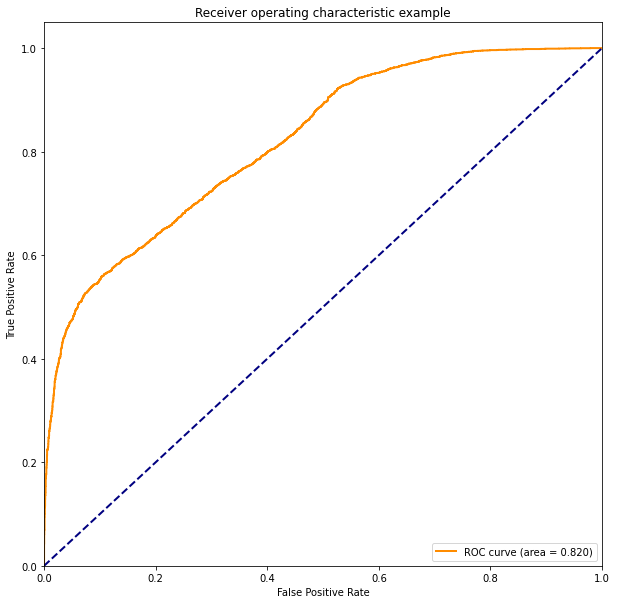

In [54]:
X=data4.drop(['trade_date','trend','trade_month'],axis=1).values
y=data4.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

new_Xtrain_set = np.reshape( Xtrain_set, (Xtrain_set.shape[0], Xtrain_set.shape[1], 1) )#Lstm调用库函数必须要进行维度转换

model = models.Sequential()
model.add( LSTM( 40, input_shape=(new_Xtrain_set.shape[1], new_Xtrain_set.shape[2]), return_sequences=True) )
model.add( LSTM( 5, return_sequences=False ) )
model.add( layers.Dropout( 0.2 ) )
model.add( layers.Dense( 1 ) )
model.compile( loss="mse", optimizer="rmsprop" )
model.fit( new_Xtrain_set, ytrain_set, epochs=20, batch_size=1)#参数依次为特征，标签，训练循环次数，小批量（一次放入训练的数据个数）

new_Xtest = np.reshape( Xtest, (Xtest.shape[0], Xtest.shape[1], 1) )#维度转换
pred_test_prob = model.predict(new_Xtest)
pred_test=list(map(f,pred_test_prob))

print(precision_score(ytest, pred_test))
print(recall_score(ytest, pred_test))
print(accuracy_score(ytest, pred_test))
acu_curve(ytest, pred_test_prob)

Epoch 1/20
21728/21728 [==============================] - 699s 32ms/step - loss: 0.2573
Epoch 2/20
21728/21728 [==============================] - 4207s 194ms/step - loss: 0.2507
Epoch 3/20
21728/21728 [==============================] - 494s 23ms/step - loss: 0.2503
Epoch 4/20
21728/21728 [==============================] - 487s 22ms/step - loss: 0.2503
Epoch 5/20
21728/21728 [==============================] - 606s 28ms/step - loss: 0.2502
Epoch 6/20
21728/21728 [==============================] - 507s 23ms/step - loss: 0.2502
Epoch 7/20
21728/21728 [==============================] - 498s 23ms/step - loss: 0.2503
Epoch 8/20
21728/21728 [==============================] - 495s 23ms/step - loss: 0.2503
Epoch 9/20
21728/21728 [==============================] - 485s 22ms/step - loss: 0.2503
Epoch 10/20
21728/21728 [==============================] - 480s 22ms/step - loss: 0.2502
Epoch 11/20
21728/21728 [==============================] - 491s 23ms/step - loss: 0.2503
Epoch 12/20
21728/21728 [===

0.0
0.0
0.5022091310751104
0.5


/Users/ressnn/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 432x288 with 0 Axes>

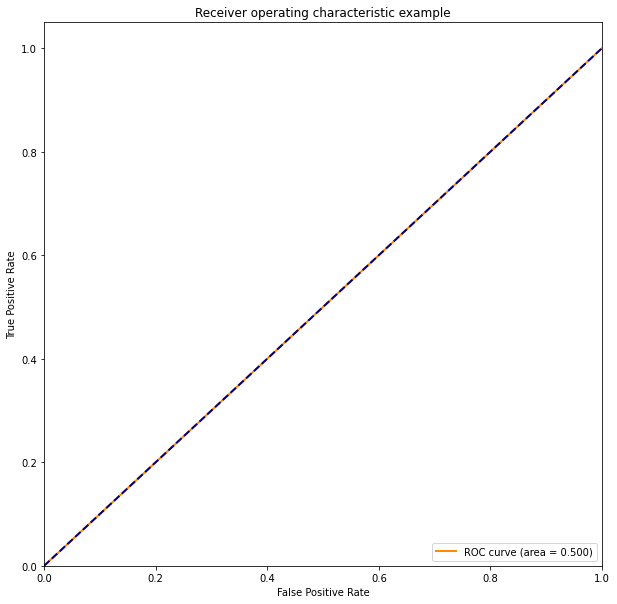

In [56]:
X=data5.drop(['trend','trade_month'],axis=1).values
y=data5.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

new_Xtrain_set = np.reshape( Xtrain_set, (Xtrain_set.shape[0], Xtrain_set.shape[1], 1) )#Lstm调用库函数必须要进行维度转换

model = models.Sequential()
model.add( LSTM( 40, input_shape=(new_Xtrain_set.shape[1], new_Xtrain_set.shape[2]), return_sequences=True) )
model.add( LSTM( 5, return_sequences=False ) )
model.add( layers.Dropout( 0.2 ) )
model.add( layers.Dense( 1 ) )
model.compile( loss="mse", optimizer="rmsprop" )
model.fit( new_Xtrain_set, ytrain_set, epochs=20, batch_size=1)#参数依次为特征，标签，训练循环次数，小批量（一次放入训练的数据个数）

new_Xtest = np.reshape( Xtest, (Xtest.shape[0], Xtest.shape[1], 1) )#维度转换
pred_test_prob = model.predict(new_Xtest)
pred_test=list(map(f,pred_test_prob))

print(precision_score(ytest, pred_test))
print(recall_score(ytest, pred_test))
print(accuracy_score(ytest, pred_test))
acu_curve(ytest, pred_test_prob)

Epoch 1/20
17854/17854 [==============================] - 538s 30ms/step - loss: 0.25720s - loss: 0.
Epoch 2/20
17854/17854 [==============================] - 480s 27ms/step - loss: 0.2512
Epoch 3/20
17854/17854 [==============================] - 405s 23ms/step - loss: 0.2507
Epoch 4/20
17854/17854 [==============================] - 392s 22ms/step - loss: 0.2493
Epoch 5/20
17854/17854 [==============================] - 371s 21ms/step - loss: 0.2490
Epoch 6/20
17854/17854 [==============================] - 371s 21ms/step - loss: 0.2491
Epoch 7/20
17854/17854 [==============================] - 371s 21ms/step - loss: 0.2488
Epoch 8/20
17854/17854 [==============================] - 372s 21ms/step - loss: 0.2490
Epoch 9/20
17854/17854 [==============================] - 371s 21ms/step - loss: 0.2490
Epoch 10/20
17854/17854 [==============================] - 373s 21ms/step - loss: 0.2489
Epoch 11/20
17854/17854 [==============================] - 371s 21ms/step - loss: 0.2490
Epoch 12/20
17854

0.5253853127833182
0.9991379310344828
0.5304659498207885
0.5243672196667525


<Figure size 432x288 with 0 Axes>

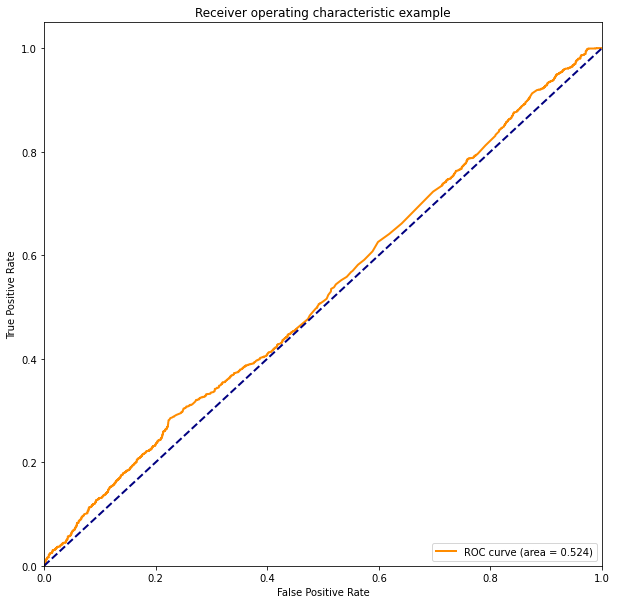

In [59]:
X=data6.drop(['trend','trade_month'],axis=1).values
y=data6.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

new_Xtrain_set = np.reshape( Xtrain_set, (Xtrain_set.shape[0], Xtrain_set.shape[1], 1) )#Lstm调用库函数必须要进行维度转换

model = models.Sequential()
model.add( LSTM( 40, input_shape=(new_Xtrain_set.shape[1], new_Xtrain_set.shape[2]), return_sequences=True) )
model.add( LSTM( 5, return_sequences=False ) )
model.add( layers.Dropout( 0.2 ) )
model.add( layers.Dense( 1 ) )
model.compile( loss="mse", optimizer="rmsprop" )
model.fit( new_Xtrain_set, ytrain_set, epochs=20, batch_size=1)#参数依次为特征，标签，训练循环次数，小批量（一次放入训练的数据个数）

new_Xtest = np.reshape( Xtest, (Xtest.shape[0], Xtest.shape[1], 1) )#维度转换
pred_test_prob = model.predict(new_Xtest)
pred_test=list(map(f,pred_test_prob))

print(precision_score(ytest, pred_test))
print(recall_score(ytest, pred_test))
print(accuracy_score(ytest, pred_test))
acu_curve(ytest, pred_test_prob)

In [69]:
data6.columns

Index(['open', 'high', 'low', 'pre_close', 'vol', 'amount', 'trend',
       'China_confirmed_num', 'China_confirmed_num_now', 'China_cured_num',
       'China_dead_num', 'trade_month', 'ppi_yoy', 'ppi_mom', 'ppi_accu',
       'nt_val', 'nt_yoy', 'nt_mom', 'town_val', 'town_yoy', 'town_mom',
       'cnt_val', 'cnt_yoy', 'cnt_mom'],
      dtype='object')

Epoch 1/20
21088/21088 [==============================] - 661s 31ms/step - loss: 0.2562
Epoch 2/20
21088/21088 [==============================] - 6498s 308ms/step - loss: 0.2509
Epoch 3/20
21088/21088 [==============================] - 497s 24ms/step - loss: 0.2507
Epoch 4/20
21088/21088 [==============================] - 553s 26ms/step - loss: 0.2507
Epoch 5/20
21088/21088 [==============================] - 625s 30ms/step - loss: 0.2509
Epoch 6/20
21088/21088 [==============================] - 843s 40ms/step - loss: 0.2502
Epoch 7/20
21088/21088 [==============================] - 528s 25ms/step - loss: 0.2503
Epoch 8/20
21088/21088 [==============================] - 518s 25ms/step - loss: 0.2501
Epoch 9/20
21088/21088 [==============================] - 647s 31ms/step - loss: 0.2502
Epoch 10/20
21088/21088 [==============================] - 618s 29ms/step - loss: 0.2503
Epoch 11/20
21088/21088 [==============================] - 607s 29ms/step - loss: 0.2502
Epoch 12/20
21088/21088 [===

0.4985776597762185
1.0
0.4985776597762185
0.5


<Figure size 432x288 with 0 Axes>

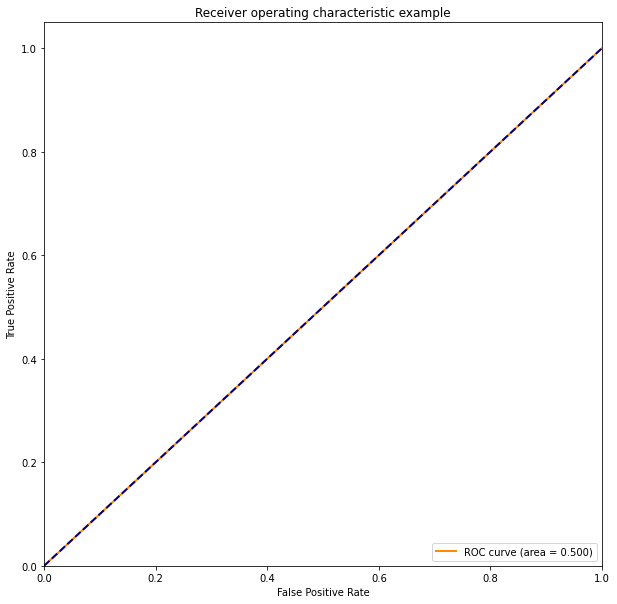

In [61]:
X=data7.drop(['trend','trade_month'],axis=1).values
y=data7.trend.values
Xtrain_set, Xtest, ytrain_set, ytest = train_test_split(X, y, test_size=0.2, random_state=24)

new_Xtrain_set = np.reshape( Xtrain_set, (Xtrain_set.shape[0], Xtrain_set.shape[1], 1) )#Lstm调用库函数必须要进行维度转换

model = models.Sequential()
model.add( LSTM( 40, input_shape=(new_Xtrain_set.shape[1], new_Xtrain_set.shape[2]), return_sequences=True) )
model.add( LSTM( 5, return_sequences=False ) )
model.add( layers.Dropout( 0.2 ) )
model.add( layers.Dense( 1 ) )
model.compile( loss="mse", optimizer="rmsprop" )
model.fit( new_Xtrain_set, ytrain_set, epochs=20, batch_size=1)#参数依次为特征，标签，训练循环次数，小批量（一次放入训练的数据个数）

new_Xtest = np.reshape( Xtest, (Xtest.shape[0], Xtest.shape[1], 1) )#维度转换
pred_test_prob = model.predict(new_Xtest)
pred_test=list(map(f,pred_test_prob))

print(precision_score(ytest, pred_test))
print(recall_score(ytest, pred_test))
print(accuracy_score(ytest, pred_test))
acu_curve(ytest, pred_test_prob)

In [64]:
data6.columns

Index(['open', 'high', 'low', 'pre_close', 'vol', 'amount', 'trend',
       'China_confirmed_num', 'China_confirmed_num_now', 'China_cured_num',
       'China_dead_num', 'trade_month', 'ppi_yoy', 'ppi_mom', 'ppi_accu',
       'nt_val', 'nt_yoy', 'nt_mom', 'town_val', 'town_yoy', 'town_mom',
       'cnt_val', 'cnt_yoy', 'cnt_mom'],
      dtype='object')

In [58]:
data2.head()

,trade_date,open,high,low,pre_close,vol,amount,trend,World_confirmed_num,World_confirmed_num_now,World_cured_num,World_dead_num,trade_month
72968,20200421,7.18,7.19,7.01,7.22,506894.10,358867.861,0,2526003,1635639,714612,175752,202004
76380,20200420,32.55,32.98,32.10,32.80,20059.38,65360.072,0,2457413,1592500,693888,171025,202004
7369,20200617,13.27,13.54,12.90,13.35,87784.49,115572.363,0,8165437,3948674,3772788,443975,202006
88657,20200413,8.17,8.37,7.98,8.18,80532.04,65810.374,0,1856782,1251923,487331,117528,202004
34600,20200515,10.32,10.52,10.30,10.29,10153.03,10553.570,1,4442667,2562654,1576742,303271,202005


In [9]:
df = pd.read_excel('with last year.xlsx')
df

,Month,Consumer Price Index,"Consumer Price Index of Food, Tobacco and Alcohol",Consumer Price Index for Clothing,Consumer Price Index for Residential,Consumer Price Index for Daily Necessities,Consumer Price Index for Traffic and Communication,Consumer Price Index for Education culture and Entertainment,Consumer Price Index for Healthcare,Consumer Price Index for Other Service
0,2021/7,1.0,-1.8,0.4,1.1,0.3,6.9,2.7,0.4,-1.3
1,2021/6,1.1,-0.4,0.4,0.9,0.3,5.8,1.5,0.3,-0.9
2,2021/5,1.3,0.8,0.4,0.7,0.4,5.5,1.5,0.2,-0.9
3,2021/4,0.9,0.1,0.2,0.4,0.4,4.9,1.3,0.1,-1.3
4,2021/3,0.4,0.1,0.1,0.2,0.0,2.7,0.4,0.2,-1.5
5,2021/2,-0.2,0.3,-0.5,-0.3,-0.2,-1.9,0.6,0.3,-0.8
6,2021/1,-0.3,1.4,-0.2,-0.4,0.0,-4.6,0.0,0.4,-0.9
7,2020/12,0.2,1.4,-0.1,-0.6,0.0,-3.1,0.9,1.3,2.2
8,2020/11,-0.5,-0.7,-0.3,-0.6,0.0,-3.9,1.0,1.5,2.5
9,2020/10,0.5,2.4,-0.3,-0.7,-0.1,-3.9,1.1,1.5,2.4


In [11]:
names=list(df.Month)
names

['2021/7',
 '2021/6',
 '2021/5',
 '2021/4',
 '2021/3',
 '2021/2',
 '2021/1',
 '2020/12',
 '2020/11',
 '2020/10',
 '2020/9',
 '2020/8',
 '2020/7',
 '2020/6',
 '2020/5',
 '2020/4',
 '2020/3',
 '2020/2',
 '2020/1',
 '2019/12',
 '2019/11',
 '2019/10',
 '2019/9']

<BarContainer object of 23 artists>

([<matplotlib.axis.XTick at 0x125eeae10>,
 [Text(0, 0, '2021/7'),
  Text(1, 0, '2021/6'),
  Text(2, 0, '2021/5'),
  Text(3, 0, '2021/4'),
  Text(4, 0, '2021/3'),
  Text(5, 0, '2021/2'),
  Text(6, 0, '2021/1'),
  Text(7, 0, '2020/12'),
  Text(8, 0, '2020/11'),
  Text(9, 0, '2020/10'),
  Text(10, 0, '2020/9'),
  Text(11, 0, '2020/8'),
  Text(12, 0, '2020/7'),
  Text(13, 0, '2020/6'),
  Text(14, 0, '2020/5'),
  Text(15, 0, '2020/4'),
  Text(16, 0, '2020/3'),
  Text(17, 0, '2020/2'),
  Text(18, 0, '2020/1'),
  Text(19, 0, '2019/12'),
  Text(20, 0, '2019/11'),
  Text(21, 0, '2019/10'),
  Text(22, 0, '2019/9')])

Text(0.5, 1.0, 'Consumer Price Index')

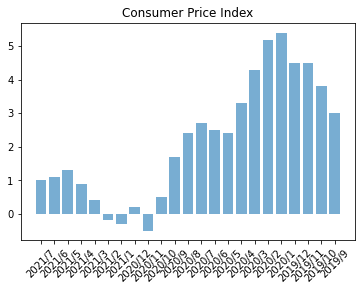

In [24]:
x = range(len(names))
y = list(df['Consumer Price Index'])
plt.bar(x, y, alpha=0.6)
plt.xticks(x, names, rotation=45)
plt.title('Consumer Price Index')
#plt.margins(0.08)

<BarContainer object of 23 artists>

([<matplotlib.axis.XTick at 0x12611a198>,
 [Text(0, 0, '2021/7'),
  Text(1, 0, '2021/6'),
  Text(2, 0, '2021/5'),
  Text(3, 0, '2021/4'),
  Text(4, 0, '2021/3'),
  Text(5, 0, '2021/2'),
  Text(6, 0, '2021/1'),
  Text(7, 0, '2020/12'),
  Text(8, 0, '2020/11'),
  Text(9, 0, '2020/10'),
  Text(10, 0, '2020/9'),
  Text(11, 0, '2020/8'),
  Text(12, 0, '2020/7'),
  Text(13, 0, '2020/6'),
  Text(14, 0, '2020/5'),
  Text(15, 0, '2020/4'),
  Text(16, 0, '2020/3'),
  Text(17, 0, '2020/2'),
  Text(18, 0, '2020/1'),
  Text(19, 0, '2019/12'),
  Text(20, 0, '2019/11'),
  Text(21, 0, '2019/10'),
  Text(22, 0, '2019/9')])

Text(0.5, 1.0, 'Consumer Price Index of Food, Tobacco and Alcohol')

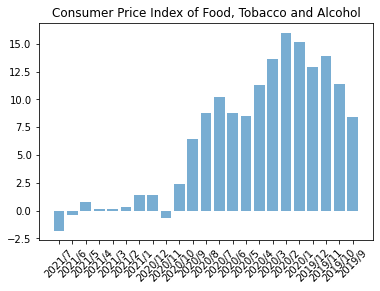

In [25]:
x = range(len(names))
y = list(df['Consumer Price Index of Food, Tobacco and Alcohol'])
plt.bar(x, y, alpha=0.6)
plt.xticks(x, names, rotation=45)
plt.title('Consumer Price Index of Food, Tobacco and Alcohol')

<BarContainer object of 23 artists>

([<matplotlib.axis.XTick at 0x1262de2e8>,
 [Text(0, 0, '2021/7'),
  Text(1, 0, '2021/6'),
  Text(2, 0, '2021/5'),
  Text(3, 0, '2021/4'),
  Text(4, 0, '2021/3'),
  Text(5, 0, '2021/2'),
  Text(6, 0, '2021/1'),
  Text(7, 0, '2020/12'),
  Text(8, 0, '2020/11'),
  Text(9, 0, '2020/10'),
  Text(10, 0, '2020/9'),
  Text(11, 0, '2020/8'),
  Text(12, 0, '2020/7'),
  Text(13, 0, '2020/6'),
  Text(14, 0, '2020/5'),
  Text(15, 0, '2020/4'),
  Text(16, 0, '2020/3'),
  Text(17, 0, '2020/2'),
  Text(18, 0, '2020/1'),
  Text(19, 0, '2019/12'),
  Text(20, 0, '2019/11'),
  Text(21, 0, '2019/10'),
  Text(22, 0, '2019/9')])

Text(0.5, 1.0, 'Consumer Price Index for Clothing')

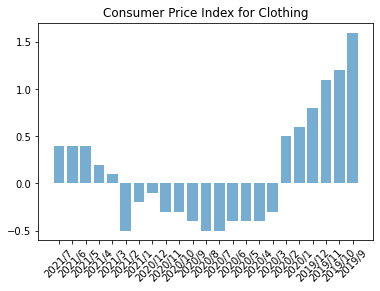

In [26]:
x = range(len(names))
y = list(df['Consumer Price Index for Clothing'])
plt.bar(x, y, alpha=0.6)
plt.xticks(x, names, rotation=45)
plt.title('Consumer Price Index for Clothing')

<BarContainer object of 23 artists>

([<matplotlib.axis.XTick at 0x126503160>,
 [Text(0, 0, '2021/7'),
  Text(1, 0, '2021/6'),
  Text(2, 0, '2021/5'),
  Text(3, 0, '2021/4'),
  Text(4, 0, '2021/3'),
  Text(5, 0, '2021/2'),
  Text(6, 0, '2021/1'),
  Text(7, 0, '2020/12'),
  Text(8, 0, '2020/11'),
  Text(9, 0, '2020/10'),
  Text(10, 0, '2020/9'),
  Text(11, 0, '2020/8'),
  Text(12, 0, '2020/7'),
  Text(13, 0, '2020/6'),
  Text(14, 0, '2020/5'),
  Text(15, 0, '2020/4'),
  Text(16, 0, '2020/3'),
  Text(17, 0, '2020/2'),
  Text(18, 0, '2020/1'),
  Text(19, 0, '2019/12'),
  Text(20, 0, '2019/11'),
  Text(21, 0, '2019/10'),
  Text(22, 0, '2019/9')])

Text(0.5, 1.0, 'Consumer Price Index for Residential')

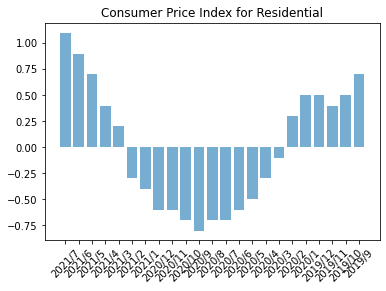

In [27]:
x = range(len(names))
y = list(df['Consumer Price Index for Residential'])
plt.bar(x, y, alpha=0.6)
plt.xticks(x, names, rotation=45)
plt.title('Consumer Price Index for Residential')

<BarContainer object of 23 artists>

([<matplotlib.axis.XTick at 0x126655240>,
 [Text(0, 0, '2021/7'),
  Text(1, 0, '2021/6'),
  Text(2, 0, '2021/5'),
  Text(3, 0, '2021/4'),
  Text(4, 0, '2021/3'),
  Text(5, 0, '2021/2'),
  Text(6, 0, '2021/1'),
  Text(7, 0, '2020/12'),
  Text(8, 0, '2020/11'),
  Text(9, 0, '2020/10'),
  Text(10, 0, '2020/9'),
  Text(11, 0, '2020/8'),
  Text(12, 0, '2020/7'),
  Text(13, 0, '2020/6'),
  Text(14, 0, '2020/5'),
  Text(15, 0, '2020/4'),
  Text(16, 0, '2020/3'),
  Text(17, 0, '2020/2'),
  Text(18, 0, '2020/1'),
  Text(19, 0, '2019/12'),
  Text(20, 0, '2019/11'),
  Text(21, 0, '2019/10'),
  Text(22, 0, '2019/9')])

Text(0.5, 1.0, 'Consumer Price Index for Daily Necessities')

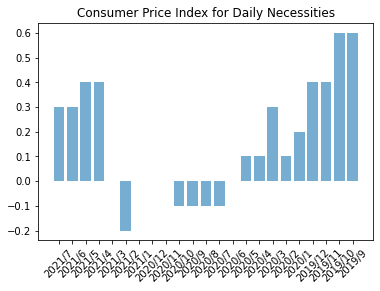

In [28]:
x = range(len(names))
y = list(df['Consumer Price Index for Daily Necessities'])
plt.bar(x, y, alpha=0.6)
plt.xticks(x, names, rotation=45)
plt.title('Consumer Price Index for Daily Necessities')

<BarContainer object of 23 artists>

([<matplotlib.axis.XTick at 0x1268786d8>,
 [Text(0, 0, '2021/7'),
  Text(1, 0, '2021/6'),
  Text(2, 0, '2021/5'),
  Text(3, 0, '2021/4'),
  Text(4, 0, '2021/3'),
  Text(5, 0, '2021/2'),
  Text(6, 0, '2021/1'),
  Text(7, 0, '2020/12'),
  Text(8, 0, '2020/11'),
  Text(9, 0, '2020/10'),
  Text(10, 0, '2020/9'),
  Text(11, 0, '2020/8'),
  Text(12, 0, '2020/7'),
  Text(13, 0, '2020/6'),
  Text(14, 0, '2020/5'),
  Text(15, 0, '2020/4'),
  Text(16, 0, '2020/3'),
  Text(17, 0, '2020/2'),
  Text(18, 0, '2020/1'),
  Text(19, 0, '2019/12'),
  Text(20, 0, '2019/11'),
  Text(21, 0, '2019/10'),
  Text(22, 0, '2019/9')])

Text(0.5, 1.0, 'Consumer Price Index for Traffic and Communication')

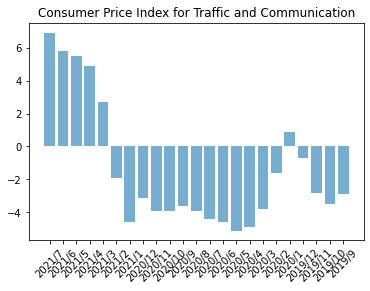

In [29]:
x = range(len(names))
y = list(df['Consumer Price Index for Traffic and Communication'])
plt.bar(x, y, alpha=0.6)
plt.xticks(x, names, rotation=45)
plt.title('Consumer Price Index for Traffic and Communication')

<BarContainer object of 23 artists>

([<matplotlib.axis.XTick at 0x1269b3b70>,
 [Text(0, 0, '2021/7'),
  Text(1, 0, '2021/6'),
  Text(2, 0, '2021/5'),
  Text(3, 0, '2021/4'),
  Text(4, 0, '2021/3'),
  Text(5, 0, '2021/2'),
  Text(6, 0, '2021/1'),
  Text(7, 0, '2020/12'),
  Text(8, 0, '2020/11'),
  Text(9, 0, '2020/10'),
  Text(10, 0, '2020/9'),
  Text(11, 0, '2020/8'),
  Text(12, 0, '2020/7'),
  Text(13, 0, '2020/6'),
  Text(14, 0, '2020/5'),
  Text(15, 0, '2020/4'),
  Text(16, 0, '2020/3'),
  Text(17, 0, '2020/2'),
  Text(18, 0, '2020/1'),
  Text(19, 0, '2019/12'),
  Text(20, 0, '2019/11'),
  Text(21, 0, '2019/10'),
  Text(22, 0, '2019/9')])

Text(0.5, 1.0, 'Consumer Price Index for Education culture and Entertainment')

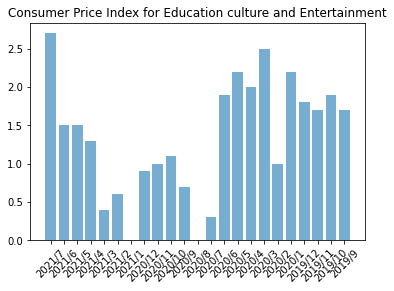

In [30]:
x = range(len(names))
y = list(df['Consumer Price Index for Education culture and Entertainment'])
plt.bar(x, y, alpha=0.6)
plt.xticks(x, names, rotation=45)
plt.title('Consumer Price Index for Education culture and Entertainment')

<BarContainer object of 23 artists>

([<matplotlib.axis.XTick at 0x126b57be0>,
 [Text(0, 0, '2021/7'),
  Text(1, 0, '2021/6'),
  Text(2, 0, '2021/5'),
  Text(3, 0, '2021/4'),
  Text(4, 0, '2021/3'),
  Text(5, 0, '2021/2'),
  Text(6, 0, '2021/1'),
  Text(7, 0, '2020/12'),
  Text(8, 0, '2020/11'),
  Text(9, 0, '2020/10'),
  Text(10, 0, '2020/9'),
  Text(11, 0, '2020/8'),
  Text(12, 0, '2020/7'),
  Text(13, 0, '2020/6'),
  Text(14, 0, '2020/5'),
  Text(15, 0, '2020/4'),
  Text(16, 0, '2020/3'),
  Text(17, 0, '2020/2'),
  Text(18, 0, '2020/1'),
  Text(19, 0, '2019/12'),
  Text(20, 0, '2019/11'),
  Text(21, 0, '2019/10'),
  Text(22, 0, '2019/9')])

Text(0.5, 1.0, 'Consumer Price Index for Healthcare')

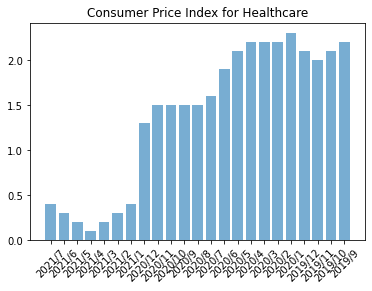

In [31]:
x = range(len(names))
y = list(df['Consumer Price Index for Healthcare'])
plt.bar(x, y, alpha=0.6)
plt.xticks(x, names, rotation=45)
plt.title('Consumer Price Index for Healthcare')

In [33]:
df = pd.read_excel('app data.xlsx')
df

,APP category,Number in 2021 (million),Number in 2020 (million),Number in 2019 (million),growth rate 2021,growth rate 2021.1
0,News,1080.53,981.99,873.093109,0.100347,0.124725
1,E-commerce,1510.41,1447.84,1096.746566,0.043216,0.320123
2,Social network,832.63,808.77,734.188728,0.029502,0.101583
3,Search engine,586.48,551.26,530.700485,0.063890,0.038740
4,Financial management,900.95,921.44,888.568317,-0.022237,0.036994
5,Education tool,188.18,187.17,142.452057,0.005396,0.313916
6,Food takeaway,189.75,190.11,163.860205,-0.001894,0.160196
7,Communication chat,1990.71,2002.46,1927.803351,-0.005868,0.038726
8,Game service,445.13,454.82,404.280688,-0.021305,0.125010
9,Parent-child service,99.77,92.52,89.360804,0.078361,0.035353


In [34]:
names=list(df['APP category'])
names

['News',
 'E-commerce',
 'Social network',
 'Search engine',
 'Financial management',
 'Education tool',
 'Food takeaway',
 'Communication chat',
 'Game service',
 'Parent-child service',
 'Video service',
 'Health care',
 'E-reading',
 'Office management',
 'Music audio']

<BarContainer object of 15 artists>

([<matplotlib.axis.XTick at 0x1271b6ba8>,
 [Text(0, 0, 'News'),
  Text(1, 0, 'E-commerce'),
  Text(2, 0, 'Social network'),
  Text(3, 0, 'Search engine'),
  Text(4, 0, 'Financial management'),
  Text(5, 0, 'Education tool'),
  Text(6, 0, 'Food takeaway'),
  Text(7, 0, 'Communication chat'),
  Text(8, 0, 'Game service'),
  Text(9, 0, 'Parent-child service'),
  Text(10, 0, 'Video service'),
  Text(11, 0, 'Health care'),
  Text(12, 0, 'E-reading'),
  Text(13, 0, 'Office management'),
  Text(14, 0, 'Music audio')])

Text(0.5, 1.0, 'Users Number in 2021 (million)')

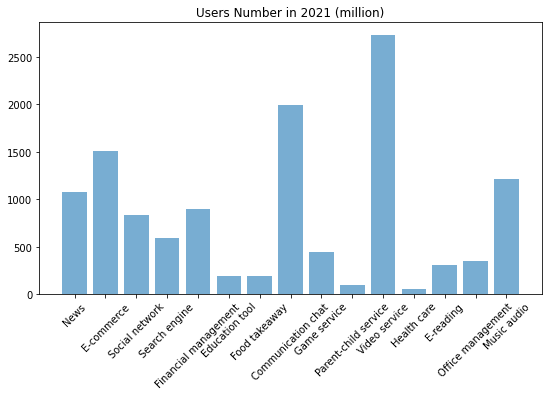

In [37]:
figsize = 9, 5

figure, ax = plt.subplots(figsize=figsize)

x = range(len(names))
y = list(df['Number in 2021 (million)'])

plt.bar(x, y, alpha=0.6)
plt.xticks(x, names, rotation=45)
plt.title('Users Number in 2021 (million)')

<BarContainer object of 15 artists>

([<matplotlib.axis.XTick at 0x12750f278>,
 [Text(0, 0, 'News'),
  Text(1, 0, 'E-commerce'),
  Text(2, 0, 'Social network'),
  Text(3, 0, 'Search engine'),
  Text(4, 0, 'Financial management'),
  Text(5, 0, 'Education tool'),
  Text(6, 0, 'Food takeaway'),
  Text(7, 0, 'Communication chat'),
  Text(8, 0, 'Game service'),
  Text(9, 0, 'Parent-child service'),
  Text(10, 0, 'Video service'),
  Text(11, 0, 'Health care'),
  Text(12, 0, 'E-reading'),
  Text(13, 0, 'Office management'),
  Text(14, 0, 'Music audio')])

Text(0.5, 1.0, 'Users Number growth rate in 2021')

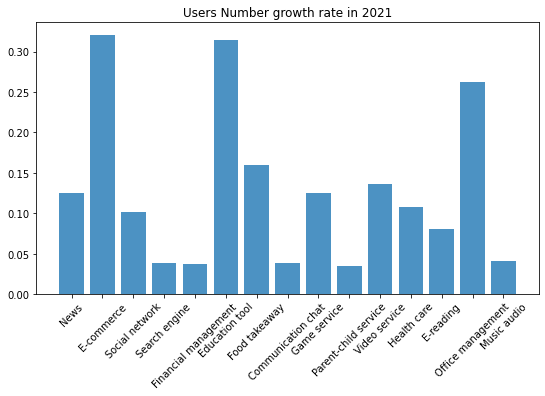

In [38]:
figsize = 9, 5

figure, ax = plt.subplots(figsize=figsize)

x = range(len(names))
y = list(df['growth rate 2021.1'])

plt.bar(x, y, alpha=0.8)
plt.xticks(x, names, rotation=45)
plt.title('Users Number growth rate in 2021')